In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

In [3]:
df=pd.read_excel("Global Superstore.xlsx")

In [4]:
pd.options.display.max_columns=None
pd.options.display.max_rows=None


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Postal Code     9994 non-null   float64       
 12  Market          51290 non-null  object        
 13  Region          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

In [6]:
df.shape

(51290, 24)

In [7]:
df["Order Date"].min(),df["Order Date"].max()

(Timestamp('2011-01-01 00:00:00'), Timestamp('2014-12-31 00:00:00'))

In [8]:
cols=["Order ID","Ship Mode","Customer ID","Postal Code","Row ID","Ship Date","Customer Name","Segment","City","State","Country","Region","Category","Sub-Category","Product Name","Quantity","Discount","Profit","Product ID"]
df.drop(cols,axis=1,inplace=True)

In [9]:
df=df.sort_values("Order Date")

In [10]:
df.isnull().sum()

Order Date        0
Market            0
Sales             0
Shipping Cost     0
Order Priority    0
dtype: int64

In [11]:
df=df.groupby("Order Date")["Sales"].sum().reset_index()

In [12]:
df["Order Date"]=pd.to_datetime(df["Order Date"])
df.set_index("Order Date",inplace=True)
df.index

DatetimeIndex(['2011-01-01', '2011-01-02', '2011-01-03', '2011-01-04',
               '2011-01-05', '2011-01-06', '2011-01-07', '2011-01-08',
               '2011-01-09', '2011-01-10',
               ...
               '2014-12-22', '2014-12-23', '2014-12-24', '2014-12-25',
               '2014-12-26', '2014-12-27', '2014-12-28', '2014-12-29',
               '2014-12-30', '2014-12-31'],
              dtype='datetime64[ns]', name='Order Date', length=1430, freq=None)

In [13]:
df.sort_index(inplace=True)
df.head(10)

,Sales
Order Date,
2011-01-01,808.56300
2011-01-02,314.22000
2011-01-03,4503.53720
2011-01-04,2808.87024
2011-01-05,3662.31000
2011-01-06,622.53810
2011-01-07,7123.01850
2011-01-08,6293.26000
2011-01-09,813.74940


In [14]:
y=df["Sales"].resample("MS").mean()

In [15]:
y

Order Date
2011-01-01     3190.273834
2011-02-01     3376.005814
2011-03-01     5025.150599
2011-04-01     4175.563006
2011-05-01     5060.270210
2011-06-01     7173.579341
2011-07-01     3983.117901
2011-08-01     7157.982456
2011-09-01    10007.395012
2011-10-01     6635.708801
2011-11-01     9949.884584
2011-12-01    11130.857820
2012-01-01     4682.093801
2012-02-01     3589.650606
2012-03-01     5824.170399
2012-04-01     5553.526535
2012-05-01     6721.448105
2012-06-01     8539.189947
2012-07-01     4841.226171
2012-08-01     9778.804593
2012-09-01     9646.305521
2012-10-01     8159.350006
2012-11-01    10783.747230
2012-12-01    10911.515052
2013-01-01     6425.351851
2013-02-01     6432.294246
2013-03-01     6406.259036
2013-04-01     6350.761316
2013-05-01     8403.179506
2013-06-01    13217.320397
2013-07-01     7417.062968
2013-08-01    10531.896431
2013-09-01    12553.974856
2013-10-01     9464.730415
2013-11-01    12896.184831
2013-12-01    13079.173485
2014-01-01     77

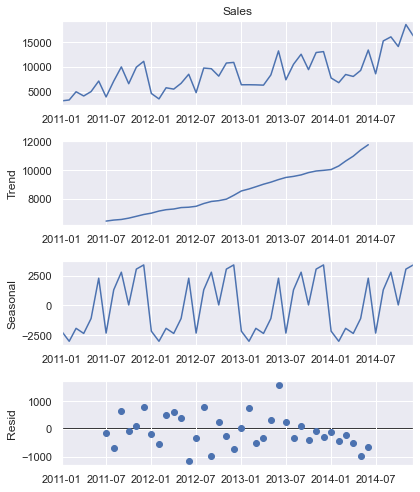

In [20]:
from pylab import rcParams
rcParams["figure.figsize"]=6,7
decomposition=sm.tsa.seasonal_decompose(y)
fig=decomposition.plot()
plt.show()

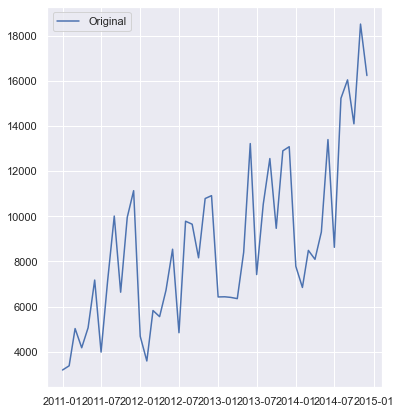

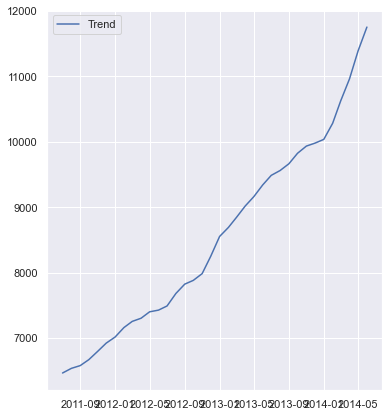

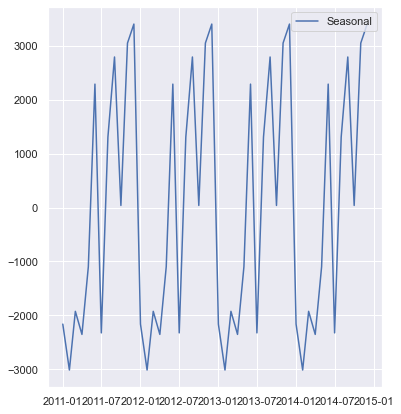

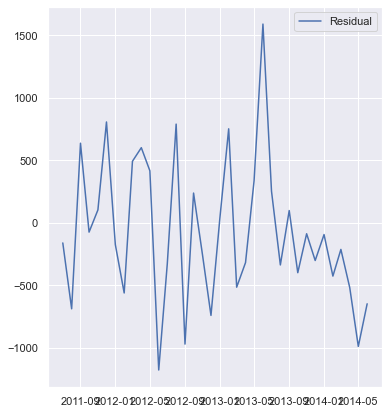

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompostition=seasonal_decompose(y)
plt.plot(y,label="Original")
plt.legend(loc="best")

trend=decomposition.trend
plt.show()
plt.plot(trend,label="Trend")
plt.legend(loc="best")

seasonal=decomposition.seasonal
plt.show()
plt.plot(seasonal,label="Seasonal")
plt.legend(loc="best")

residual=decomposition.resid
plt.show()
plt.plot(residual,label="Residual")
plt.legend(loc="best")


In [16]:
from statsmodels.tsa.stattools import  adfuller

In [17]:
from pandas import Series
from statsmodels.tsa.stattools import  adfuller
result=adfuller(y)
print("ADF Statistic: %F" % result[0])
print("p-value:%f" % result[1])
print("critical values:")
for key,value in result[4].items():
    print('\t%s: %.3f'%(key,value))

ADF Statistic: 0.672096
p-value:0.989264
critical values:
	1%: -3.621
	5%: -2.944
	10%: -2.610


!.null hypothesis: it is not stationry
2.alternative hypothesis:it is stationary
### p-value is greater than level of significance .we accept the null hypothesis